In [1]:
import sys
import os

# Add the root directory of the project to the path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..')))

# Import the modules
from pyRE.fluid.models import Gas
from pyRE.fluid.correlations import STANDINGKATZ, LEEGONZALEZEAKIN

In [2]:
# Initialise gas model
gas_model = Gas(
    critical_pressure = 673,
    critical_temperature = 343,
    molar_mass = 16.04,
    z_correlation=STANDINGKATZ,
    viscosity_correlation=LEEGONZALEZEAKIN
)

In [3]:
# Set pressure and temperature
P = 300 # psia
T = 530 # Rankine

# Calculate gas properties
print(f"z: {gas_model.z(P, T):.2f}")
print(f"rho: {gas_model.density(P, T):.2f} g/cm^3")
print(f"mu: {gas_model.viscosity(P, T):.2f} cP")
print(f"Bg: {gas_model.formation_volume_factor(P, T):.2f} rb/scf")
print(f"Cg: {gas_model.compressibility(P, T):.5f} 1/psia")

z: 0.96
rho: 0.88 g/cm^3
mu: 0.01 cP
Bg: 0.05 rb/scf
Cg: 0.00333 1/psia


/Users/andrewdean/Documents/Projects/pyRE/pyRE/fluid/correlations.py:21: RuntimeWarning: invalid value encountered in scalar power
  a = 1.39*(Tr-0.92)**0.5 - 0.36*Tr - 0.101


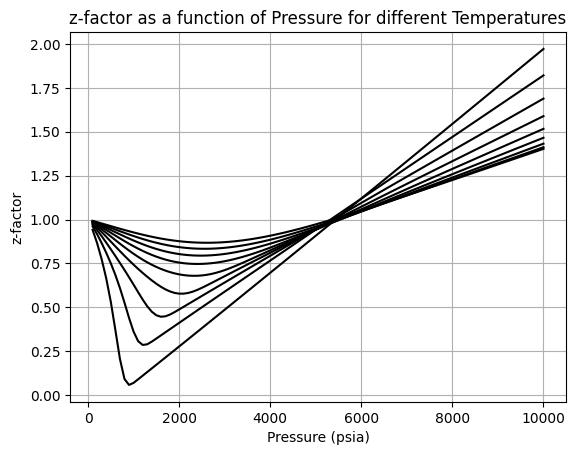

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot z factor as function of pressure, lines by temperature
P = np.linspace(100, 10000, 100)
T = np.linspace(300, 600, 10)
for t in T:
    z = np.array([gas_model.z(p, t) for p in P])
    plt.plot(P, z, label=f'T = {t} R', color = "k")

plt.xlabel('Pressure (psia)')
plt.ylabel('z-factor')
plt.title('z-factor as a function of Pressure for different Temperatures')
plt.grid(True)
plt.show()

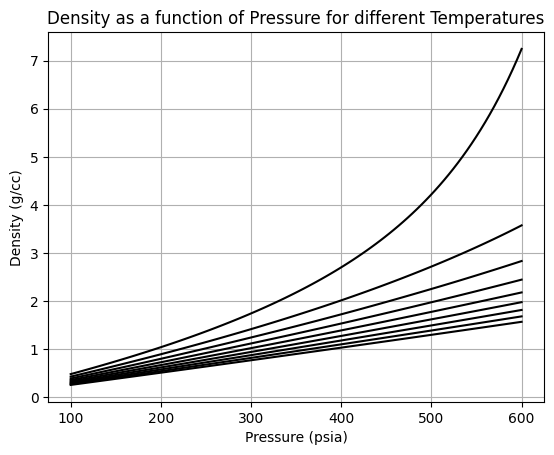

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot density as function of pressure, lines by temperature
P = np.linspace(100, 600, 100)
T = np.linspace(300, 600, 10)
for t in T:
    rho = np.array([gas_model.density(p, t) for p in P])
    plt.plot(P, rho, label=f'T = {t} R', color = "k")

plt.xlabel('Pressure (psia)')
plt.ylabel('Density (g/cc)')
plt.title('Density as a function of Pressure for different Temperatures')
plt.grid(True)
plt.show()

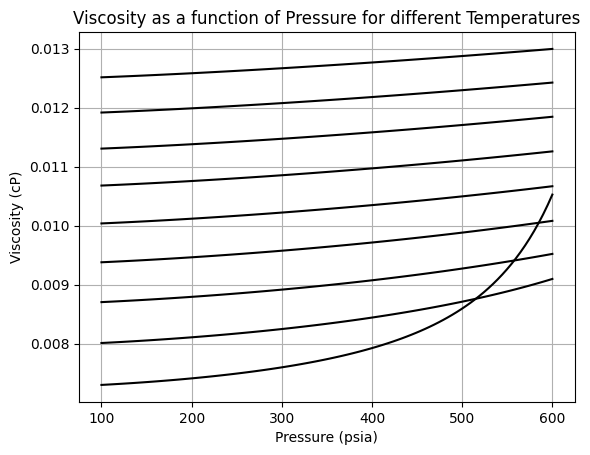

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plot viscosity as function of pressure, lines by temperature
P = np.linspace(100, 600, 100)
T = np.linspace(300, 600, 10)
for t in T:
    mu = np.array([gas_model.viscosity(p, t) for p in P])
    plt.plot(P, mu, label=f'T = {t} R', color = "k")

plt.xlabel('Pressure (psia)')
plt.ylabel('Viscosity (cP)')
plt.title('Viscosity as a function of Pressure for different Temperatures')
plt.grid(True)
plt.show()

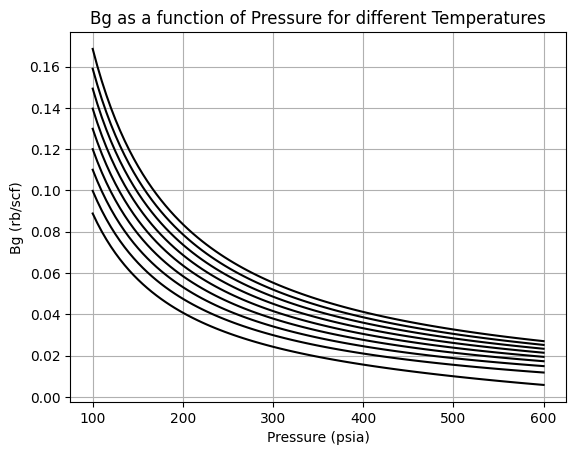

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot gas formation volume factor as function of pressure, lines by temperature
P = np.linspace(100, 600, 100)
T = np.linspace(300, 600, 10)
for t in T:
    Bg = np.array([gas_model.formation_volume_factor(p, t) for p in P])
    plt.plot(P, Bg, label=f'T = {t} R', color = "k")

plt.xlabel('Pressure (psia)')
plt.ylabel('Bg (rb/scf)')
plt.title('Bg as a function of Pressure for different Temperatures')
plt.grid(True)
plt.show()

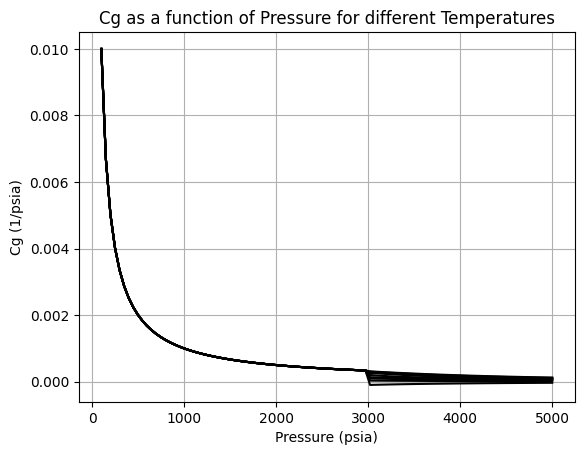

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot gas formation volume factor as function of pressure, lines by temperature
P = np.linspace(100, 5000, 100)
T = np.linspace(300, 600, 10)
for t in T:
    Bg = np.array([gas_model.compressibility(p, t) for p in P])
    plt.plot(P, Bg, label=f'T = {t} R', color = "k")

plt.xlabel('Pressure (psia)')
plt.ylabel('Cg (1/psia)')
plt.title('Cg as a function of Pressure for different Temperatures')
plt.grid(True)
plt.show()